# Benefits of MPL Modeling for Actuator Selection - Random Graph (Erdos-Renyi) analysis

Statistics on the benefits of multiplicative noise modelling for actuator selection over N realizations of Erdos-Renyi random graphs

##### Py Packages

In [1]:
import numpy as np
from copy import deepcopy as dc
# %matplotlib widget

from functionfile_system_definition import create_graph, system_package
from functionfile_system_mplcost import random_graph_emperical_simulation, plot_random_graph_simulation

### Test Parameters

In [2]:
# Number of test iterations
N_test = 50

# Edge probability
edge_probability = 0.4

# Network parameters
nx = 20           # Number of nodes
rho = 0.95        # Open-loop stability (unsigned magnitude of largest eigenvalue of dynamics matrix)
alphai = [0.1]    # Covariance on state-dependent multiplicative noise

# Initial state - realization of distribution given mean and covariance 
X0_cov = 10*np.identity(nx)
X0_mean = np.zeros(nx)

### Code

In [3]:
X0 = np.random.default_rng().multivariate_normal(mean=X0_mean, cov=X0_cov)
S_base_model = system_package(A_in=rho*create_graph(nx)['A'], alphai_in=alphai, Ai_in=create_graph(nx)['A'], X0_in=X0, label_in='System Model', print_check=False)

In [4]:
simulation_values = random_graph_emperical_simulation(S_base_model, edge_probability, N_test)

====> Breaking current simulation at t= 9 as cumulative cost magnitude exceed 1e+08
====> Breaking current simulation at t= 12 as cumulative cost magnitude exceed 1e+08
====> Breaking current simulation at t= 14 as cumulative cost magnitude exceed 1e+08
====> Breaking current simulation at t= 54 as cumulative cost magnitude exceed 1e+08


### Plot

D:\Anaconda\envs\work\lib\site-packages\numpy\linalg\linalg.py:2158: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


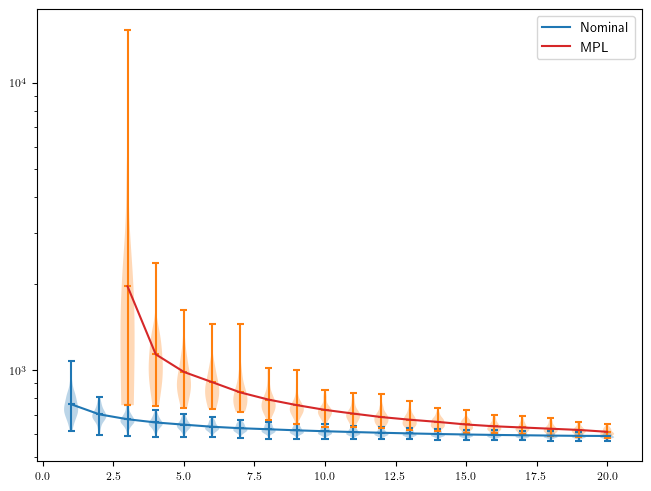

In [5]:
plot_random_graph_simulation(simulation_values)

In [6]:
print(np.shape(simulation_values['MPL_costs']))

(50, 20)


## Run Complete

In [7]:
print('Run Complete')

Run Complete
